In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #随机森林
import numpy as np
import matplotlib.pyplot as plt

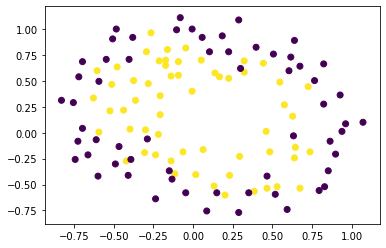

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.5)

In [10]:
def plot(model):
    # 获取数据值所在的范围
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高线图
    cs = plt.contourf(xx, yy, z)
    # 样本散点图
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    plt.show()

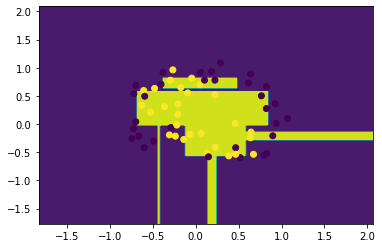

0.6949152542372882

In [11]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)
plot(dtree)
dtree.score(x_test, y_test)

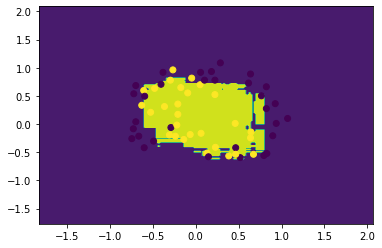

0.7796610169491526

In [13]:
RF = RandomForestClassifier(n_estimators=50)  #50个bagging 50个决策树
RF.fit(x_train, y_train)
plot(RF)
RF.score(x_test, y_test)